In [2]:
import pandas as pd
import numpy as np

In [3]:
# 분양가 파일 로드 인코딩 cp949
df_last = pd.read_csv('./open-data-set/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')
df_last.shape

(4335, 5)

In [4]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [6]:
# 전국 평균 분양가격 데이터 들고오기
df_first = pd.read_csv('./open-data-set/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.shape

(17, 22)

#### 데이터 요약하기

In [7]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


#### 결측치 보기

In [8]:
# 분양가격(㎡)의 결측치가 277개 인거를 볼 수 있다.

# isnull() 을 통해 결측치를 구합니다.
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [9]:
# isna() 을 통해 결측치를 구합니다.
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

#### 데이터 타입 변경

In [ ]:
type(np.nan)

float

In [10]:
# 분양가격이 object(문자) 타입으로 되어 있어, 데이터 타입을 변경합니다.
# errors='coerce' 옵션으로 강제로 바꿔줍니다.
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce') 
# df_last['분양가격(㎡)'].mean() # 타입 에러 발생
df_last['분양가격'].mean()

np.float64(3238.128632802628)

#### 평당분양가격 구하기
분양가격을 평당가격 기준으로 보기위해 3.3을 곱해서 '평당분양가격' 컬럼을 만들어줍니다.

In [11]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6


In [12]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [13]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다. 

df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [14]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
# 평균값과 중앙값의 차이를 봅니다.
# max값이 크기때문에 평균값이 더 크게 나오고 있습니다.

df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [ ]:
df_last['규모구분'].unique() 

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [32]:
df_last['전용면적'] = df_last['규모구분'].str.replace("전용면적", "")
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', "~")
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', "")
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '').str.strip() # 공백 제거
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [36]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [37]:
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)

In [ ]:
df_last.info() # 약 70KB 정도 메모리 사용량이 줄었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


#### groupby로 데이터 집계하기

In [47]:
# df.groupby(['인덱스로 사용할 컬럼명'])['계산할 컬럼 값'].연산()
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [50]:
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [82]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [53]:
df_last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [63]:
g = df_last.groupby(['연도','지역명'])['평당분양가격'].mean()
g.unstack().T

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


In [68]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


- groupby는 pandas series/DataFrame 형태로 출력이 된다.
- pd.pivot_table은 항상 DataFrame 형태로 출력이 된다.

In [76]:
pd.pivot_table(df_last, index=["지역명"], values=['분양가격', '평당분양가격'], aggfunc='mean')

,분양가격,평당분양가격
지역명,,
강원,2391.136364,7890.750000
경기,4047.544000,13356.895200
경남,2808.720648,9268.778138
경북,2538.344398,8376.536515
광주,3015.616915,9951.535821
대구,3630.574380,11980.895455
대전,3107.070707,10253.333333
부산,3662.764000,12087.121200
서울,7151.508000,23599.976400


In [ ]:
# df_last.groupby(['전용면적'])['평당분양가격'].mean()
pd.pivot_table(df_last, index=['전용면적'], values=['평당분양가격'], aggfunc='mean')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [99]:
# df_last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack().round()
df_last.pivot_table(index=['전용면적'], columns=['지역명'], values=['평당분양가격'])

평당분양가격                                                      \
지역명                강원         경기            경남           경북            광주   
전용면적                                                                        
102㎡~     8311.380000  14771.790  10358.363265  9157.302000  11041.532432   
60㎡       7567.098000  13251.744   8689.175000  7883.172000   9430.666667   
60㎡~85㎡   7485.588000  12523.566   8618.676000  8061.372000   9910.692000   
85㎡~102㎡  8749.557143  13677.774  10017.612000  8773.814634   9296.100000   
전체        7477.536000  12559.602   8658.672000  8078.532000   9903.630000   

                                                                          \
지역명                 대구            대전         부산         서울            세종   
전용면적                                                                       
102㎡~     13087.338000  14876.871429  13208.250  23446.038  10106.976000   
60㎡       11992.068000   9176.475000  11353.782  23212.794   9323.927027   
60㎡~85㎡   11778.690000   9711.372000  11864.820  22786.830   9775.458000   
85㎡~102㎡  11140.642857   9037.430769  12072.588  25943.874   9847.926000   
전체        11771.298000   9786.018000  11936.166  22610.346   9805.422000   

                                                                           \
지역명                 울산            인천         전남          전북            제주   
전용면적                                                                        
102㎡~      9974.448000  14362.030435  8168.4900  8193.57000  10522.787234   
60㎡        9202.106897  11241.318000  7210.1700  7609.93200  14022.221053   
60㎡~85㎡   10502.531707  11384.406000  7269.2400  7271.35200  10621.314000   
85㎡~102㎡   8861.007692  11527.560000  7908.8625  8275.78125  10709.082353   
전체        10492.712195  11257.026000  7283.5620  7292.60400  10784.994000   

                                 
지역명                충남        충북  
전용면적                             
102㎡~     8689.169388  8195.352  
60㎡       7911.156000  7103.118  
60㎡~85㎡   7818.954000  7264.488  
85㎡~102㎡  9120.045000  8391.306  
전체        7815.324000  7219.014

In [114]:
# g = df_last.groupby(['연도','지역명'])['평당분양가격'].mean()
# g.unstack()
p = df_last.pivot_table(index=['연도', '지역명'], values='평당분양가격')
p

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2019 전남    8219.275862
     전북    8532.260000
     제주   11828.469231
     충남    8748.840000
     충북    7970.875000

[85 rows x 1 columns]

#### 데이터 시각화 하기

In [123]:
import matplotlib.pyplot as plt
# 한글 폰트 적용
# plt.rc('font', family='Malgun Gothic') # Window
plt.rc('font', family='AppleGothic') # Mac

<Axes: xlabel='지역명'>

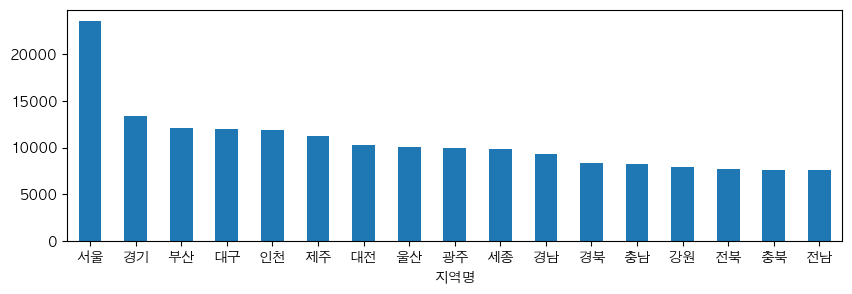

In [131]:
g = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot(kind='bar', rot=0, figsize=(10, 3))

<Axes: xlabel='전용면적'>

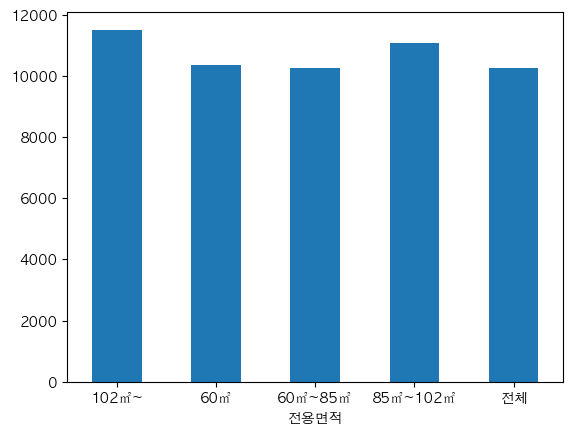

In [134]:
df_last.groupby(['전용면적'])['평당분양가격'].mean().plot(kind='bar', rot=0)

<Axes: xlabel='연도'>

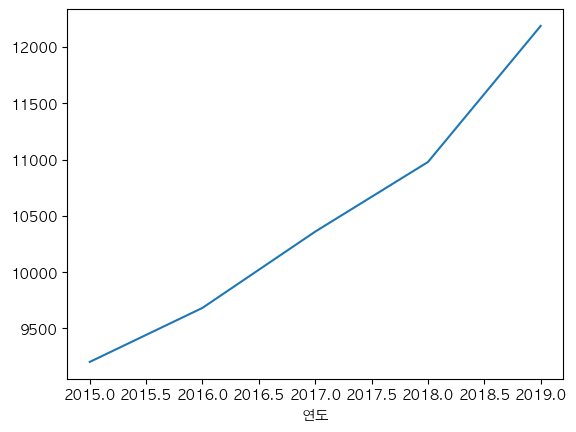

In [136]:
df_last.groupby(['연도'])['평당분양가격'].mean().plot()

#### box-and-whisker plot | diagram

- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 나타낸다

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수, 즉 중앙값
4. 제 3사분위수
5. 최댓값

In [149]:
df_last.pivot_table(index='전용면적', columns='연도', values='평당분양가격')

연도,2015,2016,2017,2018,2019
전용면적,,,,,
102㎡~,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968
60㎡,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371
60㎡~85㎡,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531
85㎡~102㎡,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816


In [150]:
df_last.pivot_table(index='월', columns='연도', values='평당분양가격')

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<Axes: >

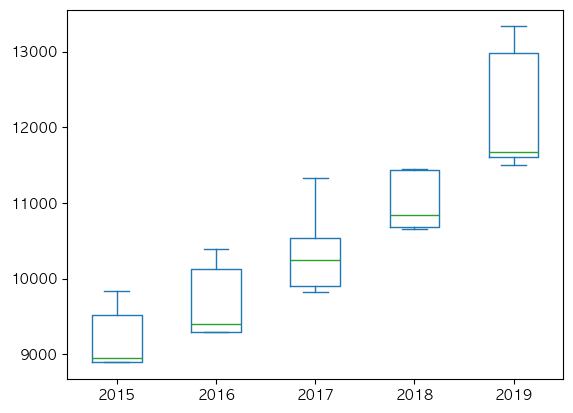

In [151]:
df_last.pivot_table(index='전용면적', columns='연도', values='평당분양가격').plot.box()

<Axes: >

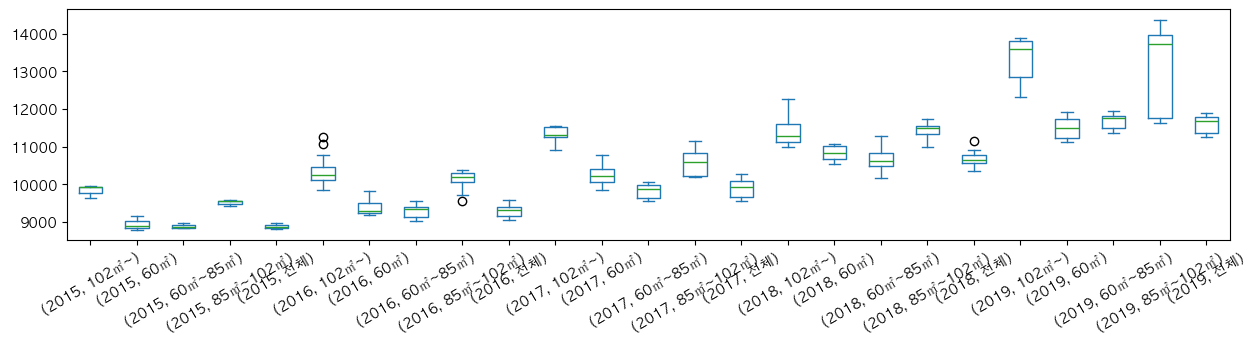

In [158]:
p = df_last.pivot_table(index='월', columns=['연도', '전용면적'], values='평당분양가격')
p.plot.box(figsize=(15, 3), rot=30)

<Axes: xlabel='연도'>

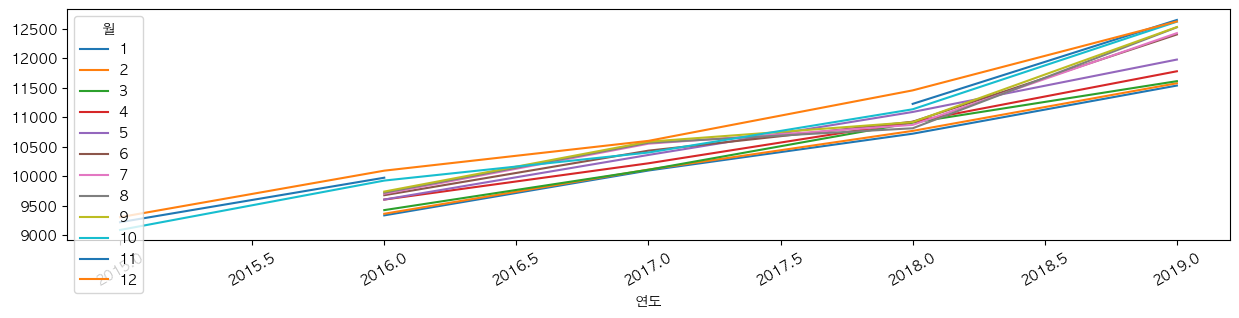

In [162]:
p = df_last.pivot_table(index='연도', columns=['월'], values='평당분양가격')
p.plot.line(figsize=(15, 3), rot=30)